# Eccentric Comets (HERMES tutorial)
The study of the outer Solar System is a popular area of research, but is difficult to study due to the inadequacy of integrators to find the right balance between speed and accuracy. HERMES, a hybrid integration scheme which combines the WHFAST and IAS15 algorithms, is well suited to study this problem.

In this example we integrate Neptune plus N eccentric comets orbiting around the sun. 

In [3]:
import rebound
import numpy as np

First let's choose the basic properties required for the HERMES integrator. In particular, we are:  
* Adding comets as *passive* bodies, which means they can influence/be influenced by other massive bodies, but are invisible to each other. This is done by setting testparticle_type to 1.
* Merging collisions according to conservation of momentum.
* Removing particles that leave our pre-defined box.
* Tracking the energy lost due to ejections or collisions.  

In [17]:
sim = rebound.Simulation()

#integrator options
sim.integrator = "hybarid"
sim.ri_hybarid.switch_radius = 6. #boundary for close encounters with planet. Units of Hill radii.
sim.ri_hybarid.CE_radius = 30.    #boundary for close encounters with sun. Units of physical radius.
sim.dt = 4
sim.testparticle_type = 1
sim.usleep = 1

#collision and boundary options
sim.collision = "direct"
sim.collision_resolve = "merge"
sim.boundary = "open"
boxsize = 200.
sim.configure_box(boxsize)
sim.collisions_track_dE = 1

#simulation time
tmax = 1e6

Now that the setup is complete, it's time to add some massive bodies to the system! When using the HERMES integrator it's always important to add the massive bodies first and passive bodies later. The "sim.N_active" variable distinguishes massive bodies from passive/test bodies.

In [18]:
sim.add(m=1., r=0.005)                 #sun
a_neptune = 30.05
sim.add(m=5e-5,r=2e-4,a=a_neptune,e=0.01)  #neptune
sim.N_active = sim.N

Now, let's create some comets! For this simple example we are assuming that all planetesimals have the same mass and radius. Other, more complicated choices are certainly possible. 

In [19]:
n_comets = 100
a = np.random.random(n_comets)*10 + a_neptune
e = np.random.random(n_comets)*0.1 + 0.8
inc = np.random.random(n_comets)*np.pi/2.
m=1e-14
r=1e-7

for i in xrange(0,n_comets):
    rand = np.random.random()*2*np.pi
    sim.add(m=m, r=r, a=a[i], e=e[i], inc=inc[i], Omega=0, omega=rand, f=rand)

Finally, since the integrator primarily uses the WHFAST algorithm we need to move to the COM frame. In addition, it is always good practice to monitor the change in energy over the course of a simulation, which requires us to calculate it before and after the simulation.

In [20]:
sim.move_to_com()
E0 = sim.calculate_energy()

We can visualize our setup using rebound.OrbitPlot

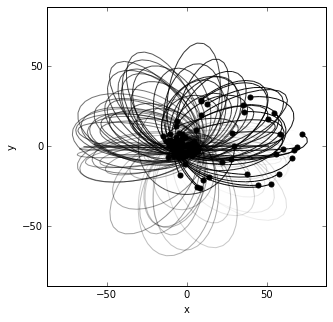

In [21]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, trails=True)

Finally, let's simulate our system for and check that our final relative energy error is small. The energy error is key measure that an intergration was done successfully. Usually anything below $10^{-6}$ is considered good. Culprits of a large energy error might be an incorrectly chosen timestep, HSR, or a combination. See the OptimizeHERMES example for efficiently finding the correct parameters for your problem.

In [22]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print dE

9.22683561473e-14
